In [1]:
import numpy

from PIL.Image import fromarray
from IPython import get_ipython
def numpy_to_png(a):
    assert 2 <= len(a.shape) <= 3, "Can't display {}-dimensional array of shape {}"\
        .format(len(a.shape), a.shape)
    return fromarray(numpy.array(numpy.clip(a, 0, 1) * 255, dtype='uint8'))._repr_png_()

get_ipython().display_formatter.formatters['image/png'].for_type(numpy.ndarray, numpy_to_png)
get_ipython().display_formatter.formatters['text/plain'].for_type(numpy.ndarray, lambda *x: "");

In [2]:
ims = numpy.load('./test_images.npy', allow_pickle=False)
# There are 6 images of shape 96x96 with 3 color channels packed into tensor
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


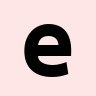

In [3]:
# display the first image (whole 4d tensor can't be rendered)
ims[0]

In [5]:
# we'll use three operations
from einops import rearrange, reduce

## Composition of axes¶

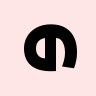

In [6]:
rearrange(ims[0], 'h w c -> w h c')

(576, 96, 3)


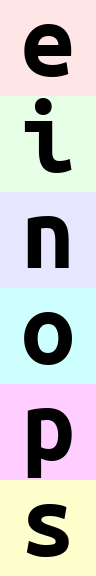

In [10]:
print(rearrange(ims, 'b h w c -> (b h) w c').shape)
rearrange(ims, 'b h w c -> (b h) w c')

(96, 576, 3)


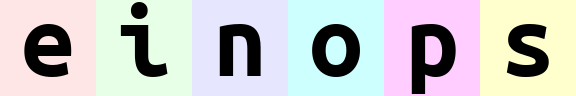

In [11]:
print(rearrange(ims, 'b h w c -> h (b w) c').shape)
rearrange(ims, 'b h w c -> h (b w) c')

## Axis decomposition

In [12]:
rearrange(ims, '(b1 b2) h w c -> b1 b2 h w c ', b1=2).shape

(2, 3, 96, 96, 3)

(192, 288, 3)


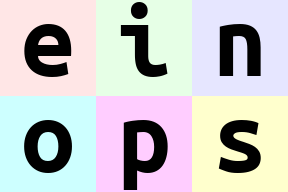

In [14]:
print(rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c ', b1=2).shape)
rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c ', b1=2)

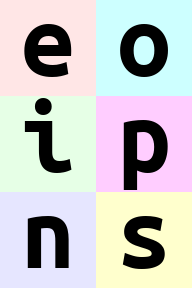

In [15]:
rearrange(ims, '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=2)

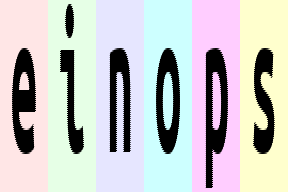

In [17]:
rearrange(ims, 'b h (w w2) c -> (h w2) (b w) c', w2=2)

## Order of axes matters

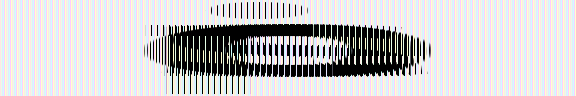

In [18]:
rearrange(ims, 'b h w c -> h (w b) c')

# einops.reduce

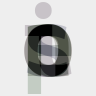

In [23]:
reduce(ims, 'b h w c -> h w c', 'mean')

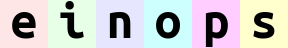

In [24]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'mean', h2=2, w2=2)

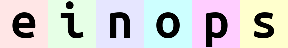

In [25]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'max', h2=2, w2=2)

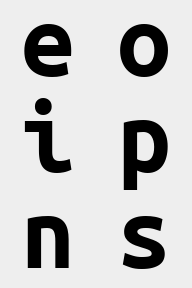

In [26]:
reduce(ims, '(b1 b2) h w c -> (b2 h) (b1 w)', 'mean', b1=2)

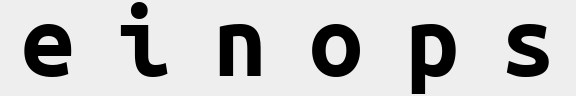

In [34]:
reduce(ims, '(b1 b2) h w c -> (b1 h) (b2 w)', 'mean', b1=1)

## Stack and concatenate

In [35]:
# rearrange can also take care of lists of arrays with the same shape
x = list(ims)
print(type(x), 'with', len(x), 'tensors of shape', x[0].shape)
# that's how we can stack inputs
# "list axis" becomes first ("b" in this case), and we left it there
rearrange(x, 'b h w c -> b h w c').shape

<class 'list'> with 6 tensors of shape (96, 96, 3)


(6, 96, 96, 3)

In [36]:
# ... or we can concatenate 
rearrange(x, 'b h w c -> h (b w) c').shape  # numpy.stack(x, axis=3))

(96, 576, 3)

## Reduce repeat

In [38]:
e_letter = ims[0]

In [40]:
# in this example we first reduced channel axis
grayscale_letter = reduce(e_letter, 'h w c -> h w', 'mean')

In [41]:
repeat(grayscale_letter, 'h w -> h w color', color=3)

NameError: name 'repeat' is not defined

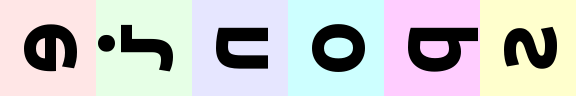

In [42]:
rearrange(ims, 'b h w c -> w (b h) c')

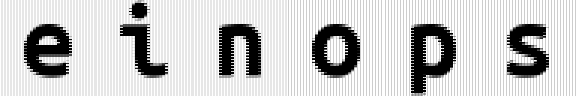

In [45]:
reduce(ims, 'b (h h2) (w w2) c -> (h w2) (b w c)', 'mean', h2=3, w2=3)